# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.
3. Perform L1 and L2 regularization on the curve obtained from step 2.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



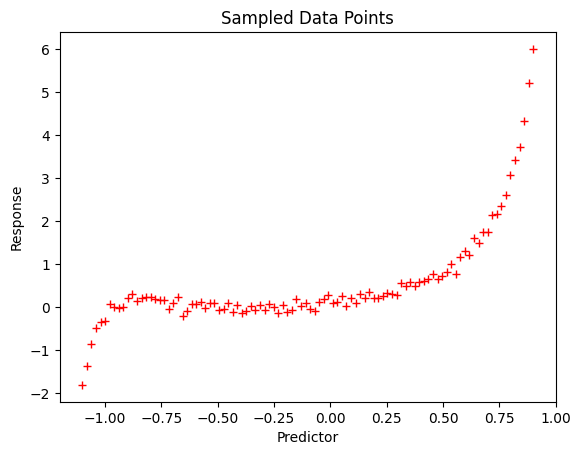

In [18]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

# Linear Regression

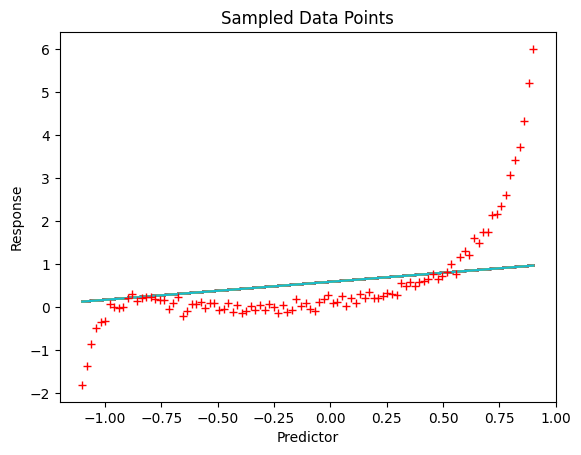


Mean Squared Error:  1.030623705444227


In [24]:
# your code here
class LinearRegression():
  def __init__(self,learning_rate=0.01,n_iters=1000):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
  def fit(self,X,y):
    num_samples,num_features = X.shape
    #initally all weights and biases assigned zeroes
    self.weights = np.zeros(num_features)
    self.bias = 0
    for i in range(self.n_iters):
      #y = wx+b
      y_pred = np.dot(X,self.weights)+self.bias
      #updating weights and biases using the prediction values and original values to fit the line to curve
      #formula => w = w - learning_rate*1/n*(sum)2xi(yi_pred-y)
      dw = (1/num_samples)*np.dot(X.T,y_pred-y)
      db = (1/num_samples)*np.sum(y_pred-y)

      self.weights = self.weights-self.learning_rate*dw
      self.bias = self.bias-self.learning_rate*db
  def predict(self,X):
    y = np.dot(X,self.weights)+self.bias
    return y
regression = LinearRegression(learning_rate = 0.001,n_iters = 1000)
predictor = predictor.reshape(len(predictor),1)
response = response.reshape(len(response),1)
regression.fit(predictor, response)
predictions = regression.predict(predictor)
mse = np.mean((response - predictions)**2)
plt.plot(predictor,predictions)
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()
print()
print("Mean Squared Error: ",mse)

# Polynomial Regression

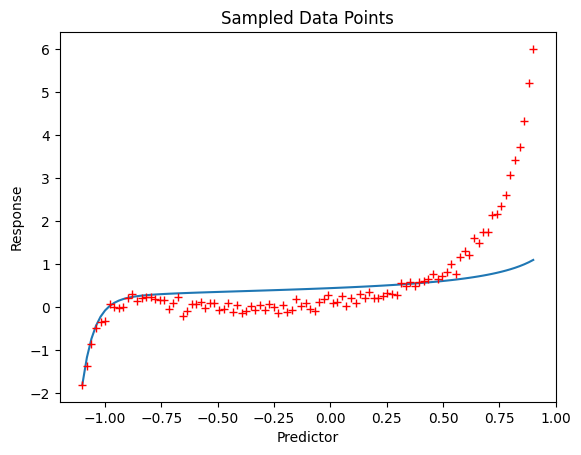


Best possible Mean squared error:  0.9187985489352245
Best possible degree:  23


In [23]:
#code goes here
class PolynomialRegression():
  def __init__(self,degree=2,learning_rate=0.01,n_iters=1000):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.degree = degree
    self.weights = None
    self.bias = None
  def fit(self,X,y):
    X_poly = np.column_stack([X**i for i in range(self.degree+1)])
    num_samples,num_features = X_poly.shape
    #initally all weights and biases assigned zeroes
    self.weights = np.zeros(num_features)
    self.bias = 0
    for i in range(self.n_iters):
      #y = wx+b
      y_pred = np.dot(X_poly,self.weights)+self.bias
      #updating weights and biases using the prediction values and original values to fit the line to curve
      #formula => w = w - learning_rate*1/n*(sum)2xi(yi_pred-y)
      y_pred=y_pred.reshape(-1,1)
      self.weights = self.weights.reshape(-1,1)
      dw = (1/num_samples)*np.dot(X_poly.T,(y_pred-y))+self.weights
      db = (1/num_samples)*np.sum(y_pred-y)
      self.weights = self.weights-self.learning_rate*dw
      self.bias = self.bias-self.learning_rate*db
  def predict(self,X):
    X_poly = np.column_stack([X**i for i in range(self.degree+1)])
    y = np.dot(X_poly,self.weights)+self.bias
    return y
mses=[]
for i in range(1,26):
  regression = PolynomialRegression(degree = i,learning_rate = 0.001,n_iters = 1000)
  predictor = predictor.reshape(-1,1)
  response = response.reshape(-1,1)
  regression.fit(predictor, response)
  predictions = regression.predict(predictor)
  mses.append(np.mean((response - predictions)**2))
plt.plot(predictor,predictions)
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()
print()
print("Best possible Mean squared error: ",min(mses))
print("Best possible degree: ",mses.index(min(mses))+1)

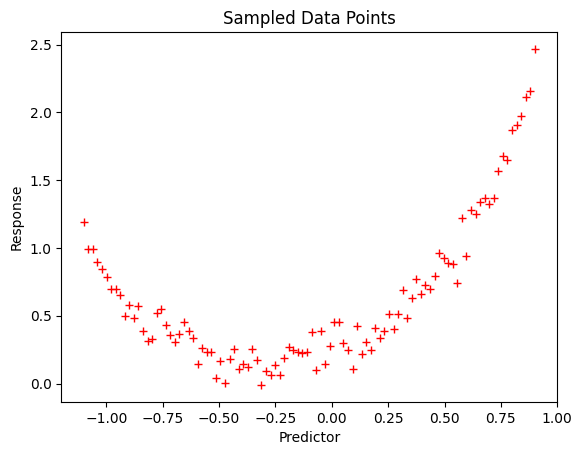

In [25]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

# Part 1.1.1: L1 Regularisation

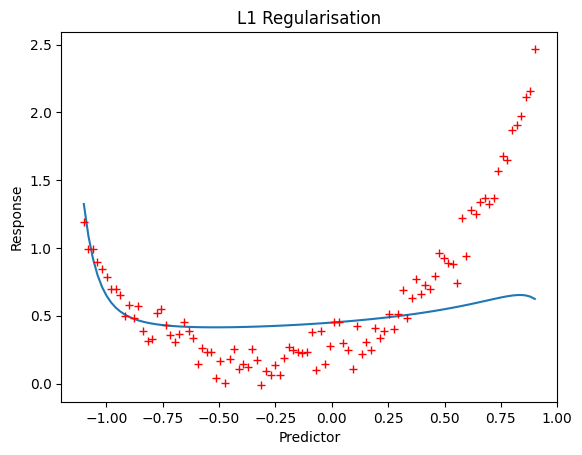


Mean Squared Error:  0.22779059096096474


In [27]:
#L1,L2 regularization
#code goes here
class Regularisation():
  def __init__(self,penalty = 1,mode="L1",degree=2,learning_rate=0.01,n_iters=1000):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.degree = degree
    self.weights = None
    self.bias = None
    self.penalty=penalty
    self.mode=mode
  def fit(self,X,y):
    X_poly = np.column_stack([X**i for i in range(self.degree+1)])
    num_samples,num_features = X_poly.shape
    #initally all weights and biases assigned zeroes
    self.weights = np.zeros(num_features)
    self.bias = 0
    for i in range(self.n_iters):
      #y = wx+b
      y_pred = np.dot(X_poly,self.weights)+self.bias
      #updating weights and biases using the prediction values and original values to fit the line to curve
      #formula => w = w - learning_rate*1/n*(sum)2xi(yi_pred-y)
      y_pred=y_pred.reshape(-1,1)
      self.weights = self.weights.reshape(-1,1)
      penaliser = 0
      if(self.mode=="L1"):
        if(np.sum(self.weights)>0):
          penaliser = self.penalty
        else:
          penaliser = -1*self.penalty
      else:
        penaliser = self.penalty*2*np.sum(self.weights)
      dw = (1/num_samples)*np.dot(X_poly.T,(y_pred-y)) + penaliser
      db = (1/num_samples)*np.sum(y_pred-y) + penaliser
      self.weights = self.weights-self.learning_rate*dw
      self.bias = self.bias-self.learning_rate*db
  def predict(self,X):
    X_poly = np.column_stack([X**i for i in range(self.degree+1)])
    y = np.dot(X_poly,self.weights)+self.bias
    return y
l_regression = Regularisation(penalty=1,mode="L1",degree = 25,learning_rate = 0.001,n_iters = 1000)
predictor_low= predictor_low.reshape(-1,1)
response_low = response_low.reshape(-1,1)
l_regression.fit(predictor_low, response_low)
predictions = l_regression.predict(predictor_low)
mse = np.mean((response_low - predictions)**2)
plt.plot(predictor_low,predictions)
plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('L1 Regularisation')
plt.show()
print()
print("Mean Squared Error: ",mse)

# L2 Regularisation

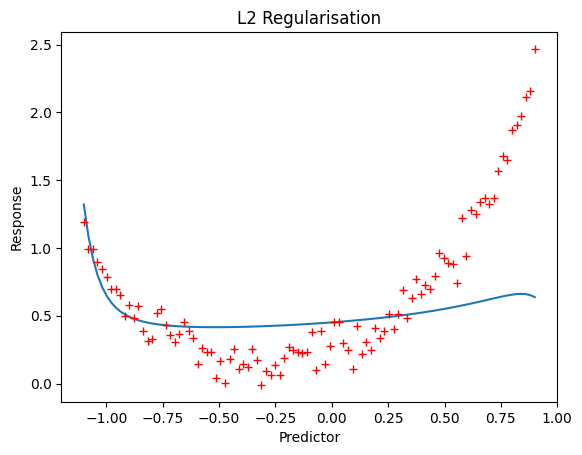


Mean Squared Error:  0.22547899072744648


In [29]:
l_regression = Regularisation(penalty=1,mode="L2",degree = 25,learning_rate = 0.001,n_iters = 1000)
predictor_low= predictor_low.reshape(-1,1)
response_low = response_low.reshape(-1,1)
l_regression.fit(predictor_low, response_low)
predictions = l_regression.predict(predictor_low)
mse = np.mean((response_low - predictions)**2)
plt.plot(predictor_low,predictions)
plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('L2 Regularisation')
plt.show()
print()
print("Mean Squared Error: ",mse)

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [7]:
def standardize(X):
  # # Standardize the data using NumPy
  mean_values = np.mean(X, axis=0)
  std_dev_values = np.std(X, axis=0)

  res = (X - mean_values) / std_dev_values
  return res

In [8]:
from sklearn.model_selection import train_test_split
credit = pd.read_csv('/content/credit.csv')
print(credit.head())

    Income  Limit  Rating  Cards  Age  Education  Balance
0   14.891   3606     283      2   34         11      333
1  106.025   6645     483      3   82         15      903
2  104.593   7075     514      4   71         11      580
3  148.924   9504     681      3   36         11      964
4   55.882   4897     357      2   68         16      331


In [9]:
# Standardize the data using NumPy
y=credit['Balance']
X=credit[['Income','Limit','Rating','Cards','Age','Education']]
#splitted in 80:20 ratio
X=standardize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_regression = LinearRegression(learning_rate = 0.01,n_iters = 1000)
multi_regression.fit(X_train,y_train)
predictions=multi_regression.predict(X_test)
mse = np.mean((y_test - predictions)**2)
print("Mean Squared Error with all features: ",mse)


Mean Squared Error with all features:  30821.918358856754


In [10]:
# Without Income
Xi=credit[['Limit','Rating','Cards','Age','Education']]
#splitted in 80:20 ratio
Xi=standardize(Xi)
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

multi_regression = LinearRegression(learning_rate = 0.01,n_iters = 1000)
multi_regression.fit(Xi_train,y_train)
predictions=multi_regression.predict(Xi_test)
msei = np.mean((y_test - predictions)**2)
print("Mean Squared Error without Income feature: ",msei)


Mean Squared Error without Income feature:  66460.6047680288


In [11]:
# Without Limit
Xi=credit[['Income','Rating','Cards','Age','Education']]
#splitted in 80:20 ratio
Xi=standardize(Xi)
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

multi_regression = LinearRegression(learning_rate = 0.01,n_iters = 1000)
multi_regression.fit(Xi_train,y_train)
predictions=multi_regression.predict(Xi_test)
msei = np.mean((y_test - predictions)**2)
print("Mean Squared Error without Limit feature: ",msei)


Mean Squared Error without Limit feature:  32324.94964900951


In [12]:
# Without Rating
Xi=credit[['Income','Limit','Cards','Age','Education']]
#splitted in 80:20 ratio
Xi=standardize(Xi)
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

multi_regression = LinearRegression(learning_rate = 0.01,n_iters = 1000)
multi_regression.fit(Xi_train,y_train)
predictions=multi_regression.predict(Xi_test)
msei = np.mean((y_test - predictions)**2)
print("Mean Squared Error without Rating feature: ",msei)

Mean Squared Error without Rating feature:  34691.668517529455


In [13]:
# Without Cards
Xi=credit[['Income','Limit','Rating','Age','Education']]
#splitted in 80:20 ratio
Xi=standardize(Xi)
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

multi_regression = LinearRegression(learning_rate = 0.01,n_iters = 1000)
multi_regression.fit(Xi_train,y_train)
predictions=multi_regression.predict(Xi_test)
msei = np.mean((y_test - predictions)**2)
print("Mean Squared Error without Cards feature: ",msei)

Mean Squared Error without Cards feature:  30400.17542347774


In [14]:
# Without Age
Xi=credit[['Income','Limit','Rating','Cards','Education']]
#splitted in 80:20 ratio
Xi=standardize(Xi)
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

multi_regression = LinearRegression(learning_rate = 0.01,n_iters = 1000)
multi_regression.fit(Xi_train,y_train)
predictions=multi_regression.predict(Xi_test)
msei = np.mean((y_test - predictions)**2)
print("Mean Squared Error without Age feature: ",msei)

Mean Squared Error without Age feature:  31092.9873039539


In [15]:
# Without Education
Xi=credit[['Income','Limit','Rating','Cards','Age']]
#splitted in 80:20 ratio
Xi=standardize(Xi)
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

multi_regression = LinearRegression(learning_rate = 0.01,n_iters = 1000)
multi_regression.fit(Xi_train,y_train)
predictions=multi_regression.predict(Xi_test)
msei = np.mean((y_test - predictions)**2)
print("Mean Squared Error without Education feature: ",msei)

Mean Squared Error without Education feature:  30838.978817398216


In [33]:
# interaction of rating and age features
Xi=credit[['Income','Limit','Rating','Cards','Age','Education']]
Xi['Interaction']=np.multiply(Xi['Rating'],Xi['Age'])
Xi=standardize(Xi)
Xi_train, Xi_test, y_train, y_test = train_test_split(Xi, y, test_size=0.2, random_state=42)

multi_regression = LinearRegression(learning_rate = 0.01,n_iters = 1000)
multi_regression.fit(Xi_train,y_train)
predictions=multi_regression.predict(Xi_test)
msei = np.mean((y_test - predictions)**2)
print("Mean Squared Error with Interaction term: ",msei)

Mean Squared Error with Interaction term:  32186.7096579119


# Conclusion:
* By observing the above experimental results, we can conclude that income feature plays a major role in predicting the target balance followed by Rating, Limit features but the remaining shows only a negligible change in mean squared error which implies that removing these featuresdoes not make any difference.
* Meanwhile interaction term of rating and age also did not give an improvement mean squared error.

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [16]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()
train, test = train_test_split(sharks, test_size=0.2, random_state=1234)

# Model 1: Including IceCreamSales
X1_train= train[['Year', 'Month', 'Temperature', 'IceCreamSales']]
X1_test=test[['Year', 'Month', 'Temperature', 'IceCreamSales']]
y1_train= train['SharkAttacks']
y1_test=test['SharkAttacks']
X1_train = standardize(X1_train)
X1_test = standardize(X1_test)

model1 = LinearRegression(learning_rate=0.01,n_iters=10000)
model1.fit(X1_train, y1_train)
m1_predictions=model1.predict(X1_test)
mse_m1 = np.mean((y1_test - m1_predictions)**2)
print("Mean Squared Error Including Icecream Sales: ",mse_m1)

# Model 2: Neglecting IceCreamSales
X2_train= train[['Year', 'Month', 'Temperature']]
X2_test=test[['Year', 'Month', 'Temperature']]
y2_train= train['SharkAttacks']
y2_test=test['SharkAttacks']
X2_train = standardize(X2_train)
X2_test = standardize(X2_test)

model2 = LinearRegression(learning_rate=0.01,n_iters=10000)
model2.fit(X2_train, y2_train)
m2_predictions=model2.predict(X2_test)
mse_m2 = np.mean((y2_test - m2_predictions)**2)
print("Mean Squared Error Neglecting Icecream Sales: ",mse_m2)

Mean Squared Error Including Icecream Sales:  37.733284010981585
Mean Squared Error Neglecting Icecream Sales:  40.14702464538989


# Conclusion:
* Even though Including Icecream Sales does not make any sense in predicting the SharkAttacks in real life, but here the observed data shows that there is a very minor improvement in mean squared error by including Icecream sales rather not including.